<a href="https://colab.research.google.com/github/rackarmattan/DAT405/blob/master/Copy_of_Assignment_7_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

**Time spent:**

Matilda: 18h 

Simon: 18h

In [ ]:
# imports
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import statistics

In [ ]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

originial_x_train = x_train

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [108]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.to_categorical(lbl_test, num_classes)



(60000, 28, 28, 1)


**Q1** Above, the data is first converted to be of type float 32. Then, all the values are normalized to be in the range [0, 1], instead of [0,255]. 

After that, the classifications are formatted. Before running ```keras.utils.to_categorical(lbl_train, num_classes)```, the class label data was a one-dimensional array with 60.000 entries and their corresponding class. After running ```keras.utils.to_categorical(lbl_train, num_classes)```, ```y_train``` and ```y_test``` become two-dimensional arrays with the shape of ```number of samples```, ```number of classes```.  

In [ ]:

## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(lr = 0.1), metrics=['accuracy'],)


fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4811 - accuracy: 0.8648 - val_loss: 0.2760 - val_accuracy: 0.9204
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2291 - accuracy: 0.9332 - val_loss: 0.1920 - val_accuracy: 0.9416
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1771 - accuracy: 0.9478 - val_loss: 0.1546 - val_accuracy: 0.9537
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1456 - accuracy: 0.9578 - val_loss: 0.1306 - val_accuracy: 0.9607
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1246 - accuracy: 0.9637 - val_loss: 0.1221 - val_accuracy: 0.9635
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1083 - accuracy: 0.9686 - val_loss: 0.1192 - val_accuracy: 0.9625
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0965 - accuracy: 0.9721 - val_loss: 0.1141 - val_accuracy: 0.9663
Epoch 

In [ ]:
model.summary()

Model: "sequential_123"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_123 (Flatten)        (None, 784)               0         
_________________________________________________________________
dense_369 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_370 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_371 (Dense)            (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


**Q2 A)**

*How many layers does the network in the notebook have?* **4**

*How many neurons does each layer
have?* 

First (Input): **784**

First (Dense): **64**

Second (Dense): **64**

Third (Output/Dense): **10**

*What activation functions and why are these appropriate for this application?*

Relu (rectified linear unit): Returns the element-wise maximum of (0, x) where x=input tensor. By using this functions, neurons that get a negative value does not get activated, i.e. their output is not considered in the next layer. 

Softmax: A logistic regression function that normalizes values to be between 0 and 1. This is appropriate to convert the values to probabilities.

*What is the
total number of parameters for the network?*

Input layer: 0

1st Dense layer: ((currrent layer neurons * previous layer neurons)+ 1 * current layer neurons) = 64 * 784+1 * 64 = 50176

2nd Dense layer: ((currrent layer neurons * previous layer neurons)+ 1 * current layer neurons) = 64 * 64 = 4096

3rd Dense layer: ((currrent layer neurons * previous layer neurons)+ 1 * current layer neurons) = 10 * 64 = 640

total: 55,050

*Why does the input and output layers have the
dimensions they have?*

The input shape is a whole image, 28 by 28 pixels big. The flatten layer flattens this matrix to a 1D array that is 28*28 long, i.e. (784, 1). The output layer has 10 neurons as it exists 10 classes.

**B)** *What loss-function is used to train the network? What is the functional form (mathematical
expression) of the loss function? and how should we interpret it? Why is it appropriate for the
problem at hand?*

The loss function used is categorical crossentropy. The equation is:

$Loss = - \sum_{i=1}^{output size}{y_i \cdot \log \hat{y_i}}$

Where $\hat{y_i}$ is the i-th scalar value in the model putput, $y_i$ is the corresponding target value and output size is the number of scalar values in the model output (in this case 10). The output values come from the last dense layer which has the softmax function applied and the target is all the classes. This loss-function is good in this casse, as something can be only one class at a time. The model learns to give a high probability to the correct class (digit in this case) and a low one to the other classes.

**C)** Look at the prints in the "Define model" cell above.


In [ ]:
## QUESTION 2 D ##
## Train and select 5 regularization factors ( l2(0.001), l2(0.0001), l2(0.00001), l2(0.000001), l2(0.0005))
## Train 3 replicate networks for EACH factor, i.e. 15 models
## Add all methods in an array
from keras.regularizers import l2

epochs = 40
models = []
l2s = [l2(0.001), l2(0.0001), l2(0.00001), l2(0.000001), l2(0.0005)]
l2index = 0
amount_replicas = 3
for i in range (1, 16):
    models.append(Sequential())
    models[i-1].add(Flatten())
    models[i-1].add(Dense(500, kernel_regularizer=l2s[l2index], activation = 'relu'))
    models[i-1].add(Dense(300, kernel_regularizer=l2s[l2index], activation = 'relu'))
    models[i-1].add(Dense(num_classes, activation='softmax'))
    if i % amount_replicas == 0 and l2index + 1 < len(l2s):
        l2index += 1


In [ ]:
## Function that runs the model given, adds the loss and accuracy together
## with the regularization level in an array and returns that array 

def run_model(ms, l2_level):
    m_scores = []
    
    for m in ms:
        m.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(lr = 0.1), metrics=['accuracy'],)

        fit_info = m.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(x_test, y_test))
        score = m.evaluate(x_test, y_test, verbose=0)
        m_scores.append((l2_level, score))
        print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

    return m_scores


In [ ]:
## Calculate the standard deviation of the accuracy inside an array and return the result

def get_stdev(m_scores):
    acc = []
    for s in m_scores:
        acc.append(s[1][1])
    return statistics.pstdev(acc)

In [ ]:
def get_mean(m_scores):
    sum = 0
    for s in m_scores:
        sum += s[1][1]
    return sum/len(m_scores)

In [ ]:
## L2 = 0.001

models1 = models[:3]
#epochs = 1

m1_scores = run_model(models1, "0.001")
m1_stdev = get_stdev(m1_scores)
print("Regularization: 0.001, stdev: ", m1_stdev)

Epoch 1/40
469/469 [==============================] - 5s 10ms/step - loss: 1.3269 - accuracy: 0.8871 - val_loss: 1.0759 - val_accuracy: 0.9352
Epoch 2/40
469/469 [==============================] - 4s 10ms/step - loss: 0.9803 - accuracy: 0.9428 - val_loss: 0.8856 - val_accuracy: 0.9514
Epoch 3/40
469/469 [==============================] - 5s 10ms/step - loss: 0.8113 - accuracy: 0.9585 - val_loss: 0.7453 - val_accuracy: 0.9602
Epoch 4/40
469/469 [==============================] - 5s 10ms/step - loss: 0.6864 - accuracy: 0.9649 - val_loss: 0.6352 - val_accuracy: 0.9651
Epoch 5/40
469/469 [==============================] - 5s 10ms/step - loss: 0.5856 - accuracy: 0.9707 - val_loss: 0.5535 - val_accuracy: 0.9668
Epoch 6/40
469/469 [==============================] - 4s 10ms/step - loss: 0.5046 - accuracy: 0.9745 - val_loss: 0.4848 - val_accuracy: 0.9698
Epoch 7/40
469/469 [==============================] - 5s 10ms/step - loss: 0.4371 - accuracy: 0.9778 - val_loss: 0.4210 - val_accuracy: 0.9721

In [ ]:
## L2 = 0.0001
epochs=40
models2 = models[3:6]
m2_scores = run_model(models2, "0.0001")
m2_stdev = get_stdev(m2_scores)
print("Regularization: 0.0001, stdev: ", m2_stdev)

Epoch 1/40
469/469 [==============================] - 5s 10ms/step - loss: 0.5017 - accuracy: 0.8906 - val_loss: 0.3135 - val_accuracy: 0.9409
Epoch 2/40
469/469 [==============================] - 4s 10ms/step - loss: 0.2898 - accuracy: 0.9455 - val_loss: 0.2684 - val_accuracy: 0.9505
Epoch 3/40
469/469 [==============================] - 5s 10ms/step - loss: 0.2391 - accuracy: 0.9597 - val_loss: 0.2241 - val_accuracy: 0.9632
Epoch 4/40
469/469 [==============================] - 5s 10ms/step - loss: 0.2084 - accuracy: 0.9680 - val_loss: 0.2057 - val_accuracy: 0.9682
Epoch 5/40
469/469 [==============================] - 5s 10ms/step - loss: 0.1880 - accuracy: 0.9744 - val_loss: 0.1917 - val_accuracy: 0.9708
Epoch 6/40
469/469 [==============================] - 4s 9ms/step - loss: 0.1729 - accuracy: 0.9782 - val_loss: 0.1836 - val_accuracy: 0.9741
Epoch 7/40
469/469 [==============================] - 5s 10ms/step - loss: 0.1606 - accuracy: 0.9815 - val_loss: 0.1738 - val_accuracy: 0.9758


In [ ]:
## L2= 0.00001
models3 = models[6:9]
m3_scores = run_model(models3, "0.00001")
m3_stdev =  get_stdev(m3_scores)
print("Regularization: 0.00001, stdev: ", m3_stdev)

Epoch 1/40
469/469 [==============================] - 5s 10ms/step - loss: 0.4116 - accuracy: 0.8874 - val_loss: 0.2454 - val_accuracy: 0.9306
Epoch 2/40
469/469 [==============================] - 4s 10ms/step - loss: 0.1998 - accuracy: 0.9451 - val_loss: 0.1698 - val_accuracy: 0.9546
Epoch 3/40
469/469 [==============================] - 5s 10ms/step - loss: 0.1477 - accuracy: 0.9601 - val_loss: 0.1426 - val_accuracy: 0.9602
Epoch 4/40
469/469 [==============================] - 5s 10ms/step - loss: 0.1195 - accuracy: 0.9683 - val_loss: 0.1181 - val_accuracy: 0.9685
Epoch 5/40
469/469 [==============================] - 5s 10ms/step - loss: 0.0990 - accuracy: 0.9745 - val_loss: 0.1026 - val_accuracy: 0.9742
Epoch 6/40
469/469 [==============================] - 5s 10ms/step - loss: 0.0842 - accuracy: 0.9792 - val_loss: 0.0920 - val_accuracy: 0.9753
Epoch 7/40
469/469 [==============================] - 5s 10ms/step - loss: 0.0728 - accuracy: 0.9823 - val_loss: 0.0862 - val_accuracy: 0.9770

In [ ]:
## L2 = 0.000001
models4 = models[9:12]
m4_scores = run_model(models4, "0.000001")
m4_stdev = get_stdev(m4_scores)
print("Regularization: 0.000001, stdev: ", m4_stdev)

Epoch 1/40
469/469 [==============================] - 5s 10ms/step - loss: 0.4088 - accuracy: 0.8874 - val_loss: 0.2119 - val_accuracy: 0.9387
Epoch 2/40
469/469 [==============================] - 5s 10ms/step - loss: 0.1915 - accuracy: 0.9451 - val_loss: 0.1546 - val_accuracy: 0.9554
Epoch 3/40
469/469 [==============================] - 5s 10ms/step - loss: 0.1406 - accuracy: 0.9597 - val_loss: 0.1236 - val_accuracy: 0.9633
Epoch 4/40
469/469 [==============================] - 5s 10ms/step - loss: 0.1107 - accuracy: 0.9684 - val_loss: 0.1100 - val_accuracy: 0.9668
Epoch 5/40
469/469 [==============================] - 5s 10ms/step - loss: 0.0910 - accuracy: 0.9748 - val_loss: 0.0944 - val_accuracy: 0.9713
Epoch 6/40
469/469 [==============================] - 5s 10ms/step - loss: 0.0754 - accuracy: 0.9787 - val_loss: 0.0866 - val_accuracy: 0.9722
Epoch 7/40
469/469 [==============================] - 5s 10ms/step - loss: 0.0642 - accuracy: 0.9820 - val_loss: 0.0868 - val_accuracy: 0.9725

In [ ]:
L2 = 0.0005
models5 = models[12:15]
m5_scores = run_model(models5, "0.0005")
m5_stdev = get_stdev(m5_scores)
print("Regularization: 0.0005, stdev: ", m5_stdev)

Epoch 1/40
469/469 [==============================] - 5s 10ms/step - loss: 0.8850 - accuracy: 0.8881 - val_loss: 0.6970 - val_accuracy: 0.9306
Epoch 2/40
469/469 [==============================] - 4s 10ms/step - loss: 0.6411 - accuracy: 0.9445 - val_loss: 0.5959 - val_accuracy: 0.9494
Epoch 3/40
469/469 [==============================] - 4s 10ms/step - loss: 0.5591 - accuracy: 0.9583 - val_loss: 0.5342 - val_accuracy: 0.9577
Epoch 4/40
469/469 [==============================] - 5s 10ms/step - loss: 0.5001 - accuracy: 0.9663 - val_loss: 0.4788 - val_accuracy: 0.9675
Epoch 5/40
469/469 [==============================] - 5s 10ms/step - loss: 0.4520 - accuracy: 0.9724 - val_loss: 0.4434 - val_accuracy: 0.9694
Epoch 6/40
469/469 [==============================] - 4s 9ms/step - loss: 0.4120 - accuracy: 0.9758 - val_loss: 0.4057 - val_accuracy: 0.9721
Epoch 7/40
469/469 [==============================] - 4s 10ms/step - loss: 0.3776 - accuracy: 0.9795 - val_loss: 0.3848 - val_accuracy: 0.9707


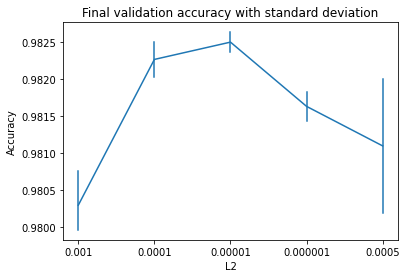

In [ ]:
## QUESTION 2 D ##
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

all_scores = [m1_scores, m2_scores, m3_scores, m4_scores, m5_scores]

tmp = []

for i in range(len(all_scores)):
    for j in range(len(all_scores[i])):
        tmp.append((all_scores[i][j][0], all_scores[i][j][1][1]))


df = pd.DataFrame(tmp, columns=["L2", "Accuracy"])

plt.title("Final validation accuracy with standard deviation")
sns.lineplot(data=df, x="L2", y="Accuracy", err_style="bars", ci=68)





**Q 2D)**
We didn't get as high accuracy as 0.9847, the highest accuracy we got was 0.9825. This may be because we splitted our training ssets differently, Hinton had 44,000 in the training set, and we have 60,000. He also had a different batch size, he had 100 and we have 128. He also preprocess his data a bit more, and makes sure that each batch contains ten of each digit. 

In [ ]:
## QUESTION 3 A error bars, seaborn, plotta skillnaden
epochs = 20
regularization = "0.00001"
regu = l2(0.00001)
conv_model = Sequential()

# Convolutional layer for the input in order to learn all the features
conv_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
conv_model.add(Flatten())
conv_model.add(Dense(64,kernel_regularizer=regu, activation = 'relu'))
conv_model.add(Dense(64,kernel_regularizer=regu, activation = 'relu'))
conv_model.add(Dense(num_classes, activation='softmax'))


cm_1 = run_model([conv_model], regularization)

conv_model2 = Sequential()

# Convolutional layer for the input in order to learn all the features
conv_model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Pooling layer to reduce the number of features from the Conv2D feature map to one quarter of the size
conv_model2.add(MaxPooling2D((2,2)))
conv_model2.add(Flatten())
conv_model2.add(Dense(64,kernel_regularizer=regu, activation = 'relu'))
conv_model2.add(Dense(64,kernel_regularizer=regu, activation = 'relu'))
conv_model2.add(Dense(num_classes, activation='softmax'))

cm_2 = run_model([conv_model2], regularization)

conv_model3 = Sequential()

# Convolutional layer for the input in order to learn all the features
conv_model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Pooling layer to reduce the number of features from the Conv2D feature map to one quarter of the size
conv_model3.add(MaxPooling2D((2,2)))
conv_model3.add(Flatten())
conv_model3.add(Dense(64,kernel_regularizer=regu, activation = 'relu'))
conv_model3.add(Dense(64,kernel_regularizer=regu, activation = 'relu'))
# Dropot layer to reduce overfitting of the data
conv_model3.add(Dropout(0.5))
conv_model3.add(Dense(num_classes, activation='softmax'))

cm_3 = run_model([conv_model3], regularization)


Epoch 1/20
469/469 [==============================] - 30s 64ms/step - loss: 0.3723 - accuracy: 0.8872 - val_loss: 0.1767 - val_accuracy: 0.9439
Epoch 2/20
469/469 [==============================] - 30s 64ms/step - loss: 0.1540 - accuracy: 0.9523 - val_loss: 0.1485 - val_accuracy: 0.9530
Epoch 3/20
469/469 [==============================] - 30s 64ms/step - loss: 0.1169 - accuracy: 0.9643 - val_loss: 0.2475 - val_accuracy: 0.9206
Epoch 4/20
469/469 [==============================] - 30s 64ms/step - loss: 0.0940 - accuracy: 0.9718 - val_loss: 0.1028 - val_accuracy: 0.9678
Epoch 5/20
469/469 [==============================] - 30s 64ms/step - loss: 0.0780 - accuracy: 0.9766 - val_loss: 0.0812 - val_accuracy: 0.9742
Epoch 6/20
469/469 [==============================] - 30s 64ms/step - loss: 0.0655 - accuracy: 0.9795 - val_loss: 0.0964 - val_accuracy: 0.9696
Epoch 7/20
469/469 [==============================] - 30s 64ms/step - loss: 0.0563 - accuracy: 0.9827 - val_loss: 0.0761 - val_accuracy:

In [ ]:
conv_model4 = Sequential()

# Convolutional layer for the input in order to learn all the features
conv_model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Pooling layer to reduce the number of features from the Conv2D feature map to one quarter of the size
conv_model4.add(MaxPooling2D((2,2)))
conv_model4.add(Flatten())
conv_model4.add(Dense(64,kernel_regularizer=regu, activation = 'relu'))
# Dropot layer to reduce overfitting of the data
conv_model4.add(Dropout(0.5))
conv_model4.add(Dense(64,kernel_regularizer=regu, activation = 'relu'))
conv_model4.add(Dense(num_classes, activation='softmax'))

cm_4 = run_model([conv_model4], regularization)

Epoch 1/20
469/469 [==============================] - 22s 47ms/step - loss: 0.6737 - accuracy: 0.7833 - val_loss: 0.2386 - val_accuracy: 0.9273
Epoch 2/20
469/469 [==============================] - 22s 46ms/step - loss: 0.3488 - accuracy: 0.8938 - val_loss: 0.1612 - val_accuracy: 0.9491
Epoch 3/20
469/469 [==============================] - 22s 46ms/step - loss: 0.2541 - accuracy: 0.9250 - val_loss: 0.1123 - val_accuracy: 0.9662
Epoch 4/20
469/469 [==============================] - 22s 47ms/step - loss: 0.1924 - accuracy: 0.9433 - val_loss: 0.0887 - val_accuracy: 0.9713
Epoch 5/20
469/469 [==============================] - 22s 46ms/step - loss: 0.1596 - accuracy: 0.9536 - val_loss: 0.0763 - val_accuracy: 0.9755
Epoch 6/20
469/469 [==============================] - 22s 46ms/step - loss: 0.1400 - accuracy: 0.9592 - val_loss: 0.0680 - val_accuracy: 0.9788
Epoch 7/20
469/469 [==============================] - 21s 46ms/step - loss: 0.1242 - accuracy: 0.9633 - val_loss: 0.0672 - val_accuracy:

In [ ]:
conv_model5 = Sequential()

# Convolutional layer for the input in order to learn all the features
conv_model5.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Convolutional layer for the input in order to learn all the features
conv_model5.add(Conv2D(32, (3, 3), activation='relu'))
# Pooling layer to reduce the number of features from the Conv2D feature map to one quarter of the size
conv_model5.add(MaxPooling2D((2,2)))
conv_model5.add(Dropout(0.25))
conv_model5.add(Flatten())
conv_model5.add(Dense(64,kernel_regularizer=regu, activation = 'relu'))
# Dropot layer to reduce overfitting of the data
conv_model5.add(Dropout(0.5))
conv_model5.add(Dense(64,kernel_regularizer=regu, activation = 'relu'))
conv_model5.add(Dense(num_classes, activation='softmax'))

cm_5 = run_model([conv_model5], regularization)

Epoch 1/20
469/469 [==============================] - 96s 206ms/step - loss: 0.6716 - accuracy: 0.7774 - val_loss: 0.1479 - val_accuracy: 0.9535
Epoch 2/20
469/469 [==============================] - 95s 204ms/step - loss: 0.2469 - accuracy: 0.9249 - val_loss: 0.0835 - val_accuracy: 0.9738
Epoch 3/20
469/469 [==============================] - 96s 204ms/step - loss: 0.1736 - accuracy: 0.9486 - val_loss: 0.0654 - val_accuracy: 0.9796
Epoch 4/20
469/469 [==============================] - 94s 201ms/step - loss: 0.1422 - accuracy: 0.9585 - val_loss: 0.0604 - val_accuracy: 0.9813
Epoch 5/20
469/469 [==============================] - 94s 200ms/step - loss: 0.1274 - accuracy: 0.9621 - val_loss: 0.0493 - val_accuracy: 0.9849
Epoch 6/20
469/469 [==============================] - 94s 200ms/step - loss: 0.1120 - accuracy: 0.9671 - val_loss: 0.0480 - val_accuracy: 0.9859
Epoch 7/20
469/469 [==============================] - 95s 202ms/step - loss: 0.1017 - accuracy: 0.9704 - val_loss: 0.0467 - val_ac

In [ ]:
print("1 convolutional accuracy:", round(cm_1[0][1][1] * 100,4), "%")
print("1 convolutional and MaxPool accuracy:", round(cm_2[0][1][1] * 100,4), "%")
print("1 convolutional and MaxPool (2,2) and one dropout (0.5) between last Dense and output layer accuracy:",round(cm_3[0][1][1] * 100,4),"%")
print("1 convolutional and MaxPool (2,2) and one dropout (0.5) between the two Dense layers accuracy:", round(cm_4[0][1][1] * 100,4),"%")
print("2 convolutional layers after each other followed by 1 MaxPool (2,2) and one dropout (0.25). \n At the end, one dropout layer (0.5) between the two Dense layers. Accuracy:", round(cm_5[0][1][1] * 100,4),"%")


1 convolutional accuracy: 98.36 %
1 convolutional and MaxPool accuracy: 98.25 %
1 convolutional and MaxPool (2,2) and one dropout (0.5) between last Dense and output layer accuracy: 98.56 %
1 convolutional and MaxPool (2,2) and one dropout (0.5) between the two Dense layers accuracy: 98.67 %
2 convolutional layers after each other followed by 1 MaxPool (2,2) and one dropout (0.25). 
 At the end, one dropout layer (0.5) between the two Dense layers. Accuracy: 98.89 %


**Q3 A)**
The first model has a convolutional layer applied directly on the input, (input shape 28x28 matrix with 1 RGB channel). This is directly flatten to make it linear to the fully connected dense layer afterwards. This got an accuracy of 98.36%.

The second model has a ```MaxPooling2D``` layer applied after the ```Conv2D``` layer. This is added to reduce the number of different features in the feature map, as the ```Conv2D``` layer can make new features of features that look almost the same, but are, for example, moved just a small bit. This ```MaxPooling2D``` layer reduces the features to a quarter. This got an accuracy of 98.25%.

The third model has a ```Dropout``` layer added as well. This is added to reduce overfitting. The fully connected layers may have made a function that fits the training data too well, i.e. is not general. The droput layer turn off hidden units with the probability of 0.5. This reduces the amount of data that is propagated forward, which also may reduce the number of points that caused the overfitted approximation. This got an accuracy of 98.56%.

The fourth model has a similar structure as the third, but the dropout layer is moved to be between the two dense layers with 64 nodes. This got an accuracy of 98.67%.

The last model has two convolutional layers after each other followed by one MaxPool (2,2) and one dropout (0.25). At the end, one dropout layer (0.5) between the two Dense layers. This got an accuracy: 98.89 %.

We did not get as high accuracy as the example (99% accuracy), but our best attempt was the last one with 98.89%.

**Q3 B)**

When doing image classification, convolutional layers can be more effective than only fully-connected layers, as they learn features from the input. In convolutional layers, a weight matrix is applied to portions of the input at a time, to create a feature map. In fully connected layers, a weight is applied to all the inputs seperately. This makes fully connected layers more general, hence no assumptions of the data. 

Convolutional layers are well-suited for data that can be interpreted as spatial, as the same weight matrix is applied all over the data. This means that some pattern is evenly likely to occur at all positions of the data. As we know that the data is indeed images, the convolutional layers work well. 


### Question 4) Auto-Encoder for denoising


In [100]:
## Given vode

import numpy as np

def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)


**Q4 A)**

First, the datasets are flattened to 1-dimensional arrays that is 784 long (28x28 pixels, as the images originally are). This is for the Dense layers later, that want linear input data. After that, noise is added to the images as they are not noisy to begin with. 


In [ ]:
## Given code

latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

**Q4 A) cont**

1st, the input is set with the shape of our ```flattened_x_tran``` and ```test```.

2nd, an encoded representation of the input is made thruogh a ```Dense``` layer. This is the beginning of the compression of the image.

3rd, another encoded layer is added with the smallest number of neurons (96), which is the maximum point of compression of the image. The input is the already encoded version of the image.

4th, The beginning of reconstructing the image, again with 128 neurons. The decoder uses the encoded image as input. 

5th, the last layer that tries to reconstruct the image from the encoded image. This layer has 784 neurons, as that was what we started with (28x28 pixels = 784). 

After the layers have been made, the ```autoencoder``` object is created, which maps an input to the reconstruction. Same goes for the ```encoder_only``` object, but it maps the input to the encoded part. 

After that, the encoded input is set and the last two layers of the decoder is retrieved. Finally, the ```decoder``` is created by the encoded input and the two decoder layers. At the final line, the autoencoder is compiled with the crossentropy loss. 

In this case, the loss function (binary crossentropy) calculates the error of the original (not noisy) input and the recosntruciton of the input that was noisy. This is done pixel-wise. This loss function works well here, as eveery pixel could be either a good prediction (correct color) of how it was supposed to be, or a bad (incorrect color), which makes it binary.

**Diagram of the autoencoder model**

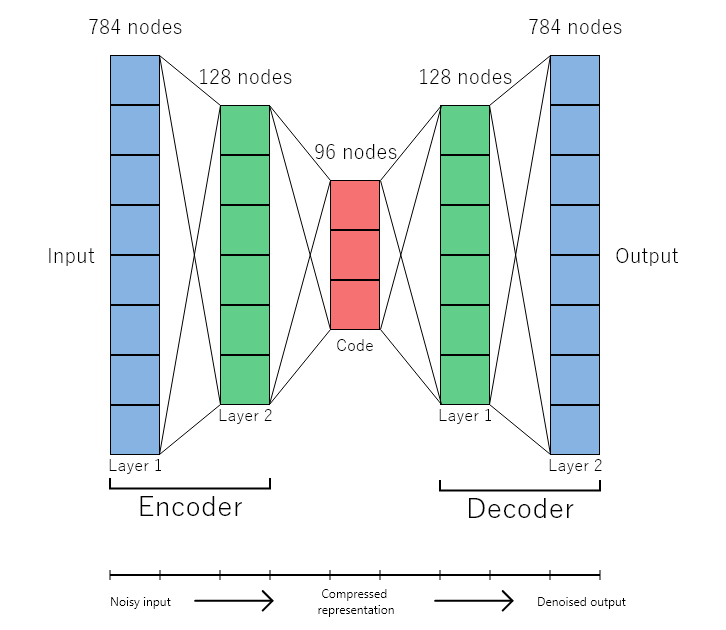

In [ ]:
## Help function for visualizing all the different images

def visualize(index,encoder,decoder):
    """Draws original, encoded and decoded images"""
    
    img = flattened_x_train_seasoned[index]
    og_img = originial_x_train[index]

    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model input
    
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(np.reshape(og_img, (28,28)), cmap='gray')
    #plt.title("Code")
    #plt.imshow(code.reshape([code.shape[-1]//2,-1]))
    
    plt.subplot(1,3,2)
    plt.title("Noisy")
    plt.imshow(np.reshape(img, (28,28)), cmap='gray')

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    plt.imshow(np.reshape(reco, (28,28)), cmap='gray')
    plt.show()

In [90]:
def reconstruct_all_images(encoder, decoder):
    recos = []
    for i, img in enumerate(flattened_x_train_seasoned):
        if i % 500 == 0:
            print(i)
        
        code = encoder.predict(img[None])[0]
        recos.append(decoder.predict(code[None])[0])
    
    return recos


In [104]:
def reconstruct_all_test_images(encoder, decoder):
    recos = []
    for i, img in enumerate(flattened_x_test_seasoneed):
        if i % 500 == 0:
            print(i)
        
        code = encoder.predict(img[None])[0]
        recos.append(decoder.predict(code[None])[0])
    
    return recos

In [ ]:
## Given code
fit_info_AE =   autoencoder.fit(
                    flattened_x_train_seasoned, 
                    flattened_x_train,
                    epochs=32,
                    batch_size=64,
                    shuffle=True,
                    validation_data=(flattened_x_test_seasoneed, flattened_x_test)
                )

Epoch 1/32
938/938 [==============================] - 6s 7ms/step - loss: -771176358842728448.0000 - val_loss: -827052027937816576.0000
Epoch 2/32
938/938 [==============================] - 6s 7ms/step - loss: -840633126844628992.0000 - val_loss: -905925975592665088.0000
Epoch 3/32
938/938 [==============================] - 6s 7ms/step - loss: -923189957416189952.0000 - val_loss: -996520579760652288.0000
Epoch 4/32
938/938 [==============================] - 6s 7ms/step - loss: -1015948331748163584.0000 - val_loss: -1096638329014714368.0000
Epoch 5/32
938/938 [==============================] - 6s 7ms/step - loss: -1117369964353814528.0000 - val_loss: -1205226922007592960.0000
Epoch 6/32
938/938 [==============================] - 6s 7ms/step - loss: -1226704232388755456.0000 - val_loss: -1321854456828002304.0000
Epoch 7/32
938/938 [==============================] - 6s 7ms/step - loss: -1344088368648028160.0000 - val_loss: -1446894767429386240.0000
Epoch 8/32
938/938 [====================

Noise level: 0.4 (trained noise level


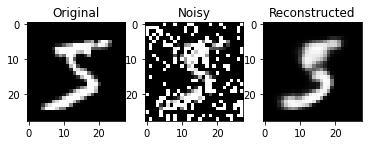

Noise level: 0.1


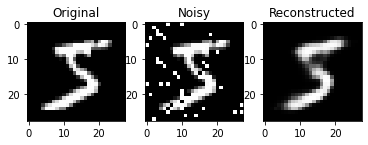

Noise level: 0.2


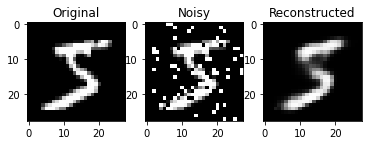

Noise level: 0.30000000000000004


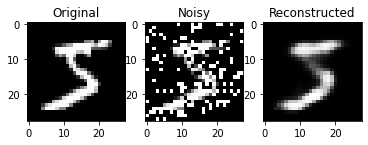

Noise level: 0.5


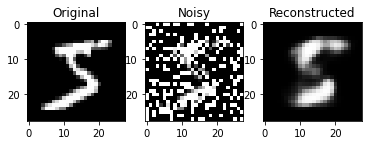

Noise level: 0.6


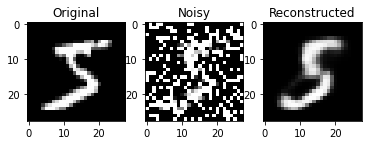

Noise level: 0.7


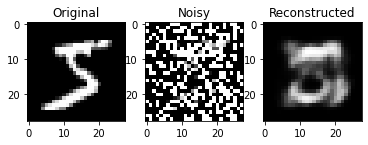

Noise level: 0.7999999999999999


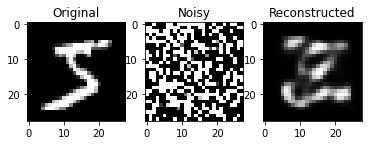

In [ ]:
## QUESTION 4 B

print("Noise level: 0.4 (trained noise level)")
visualize(0, encoder_only, decoder)

x = 0.2

while x <= 0.7:
    if x != 0.4:
        flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=x)
        flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=x)
        print("Noise level:", str(x))
        visualize(0, encoder_only, decoder)
    x+=0.1

**4 B)**

As can be seen in the above cell, the digits become difficult to see at a noise level around 0.7.

In [ ]:
## QUESTION 4 C ##
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)
reco_imgs = reconstruct_all_images(encoder_only, decoder)


In [97]:
reco_train_images = reco_imgs

60000


In [ ]:
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)

reco_imgs_test = reconstruct_all_test_images(encoder_only, decoder)

In [106]:
reco_test_images = reco_imgs_test

In [ ]:
# Reshape the reconstructed image arrays in order to fit the classifier model

reco_test_images = np.array(reco_test_images)
reco_test_images = reco_test_images.reshape(reco_test_images.shape[0], img_rows, img_cols, 1)
reco_train_images = np.array(reco_train_images)
reco_train_images = reco_train_images.reshape(reco_train_images.shape[0], img_rows, img_cols, 1)

In [119]:
## QUESTION 4 C Run the best model from 3 with the new, denoised sets ##
conv_model5 = Sequential()

# Convolutional layer for the input in order to learn all the features
conv_model5.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Convolutional layer for the input in order to learn all the features
conv_model5.add(Conv2D(32, (3, 3), activation='relu'))
# Pooling layer to reduce the number of features from the Conv2D feature map to one quarter of the size
conv_model5.add(MaxPooling2D((2,2)))
conv_model5.add(Dropout(0.25))
conv_model5.add(Flatten())
conv_model5.add(Dense(64,kernel_regularizer=l2(0.00001), activation = 'relu'))
# Dropot layer to reduce overfitting of the data
conv_model5.add(Dropout(0.5))
conv_model5.add(Dense(64,kernel_regularizer=l2(0.00001), activation = 'relu'))
conv_model5.add(Dense(num_classes, activation='softmax'))

conv_model5.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(lr = 0.1), metrics=['accuracy'],)

fit_info = conv_model5.fit(reco_train_images, y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1,
        validation_data=(reco_test_images, y_test))


Epoch 1/40
469/469 [==============================] - 95s 203ms/step - loss: 0.8600 - accuracy: 0.7187 - val_loss: 0.3875 - val_accuracy: 0.8755
Epoch 2/40
469/469 [==============================] - 95s 202ms/step - loss: 0.4939 - accuracy: 0.8497 - val_loss: 0.3066 - val_accuracy: 0.9057
Epoch 3/40
469/469 [==============================] - 95s 202ms/step - loss: 0.4164 - accuracy: 0.8726 - val_loss: 0.2881 - val_accuracy: 0.9090
Epoch 4/40
469/469 [==============================] - 95s 202ms/step - loss: 0.3839 - accuracy: 0.8849 - val_loss: 0.2597 - val_accuracy: 0.9199
Epoch 5/40
469/469 [==============================] - 94s 201ms/step - loss: 0.3583 - accuracy: 0.8917 - val_loss: 0.2468 - val_accuracy: 0.9224
Epoch 6/40
469/469 [==============================] - 95s 202ms/step - loss: 0.3455 - accuracy: 0.8960 - val_loss: 0.2445 - val_accuracy: 0.9265
Epoch 7/40
469/469 [==============================] - 94s 201ms/step - loss: 0.3312 - accuracy: 0.8993 - val_loss: 0.2361 - val_ac

In [157]:
## QUESTION 4 C ## 

score = conv_model5.evaluate(reco_test_images, y_test, verbose=0)
print("Accuracy for denoised images on the previously best performing model")
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))


Accuracy for denoised images on the previously best performing model
Test loss: 0.21644531190395355, Test accuracy 0.9370999932289124


In [152]:
## This is our intepretation of question 4C, if you expect us to do train our model with different
## levels of denoised images, that would have taken several days (approx 1 hour for denoising 60,000 images and 45 min
## for training the model), even on google colab. This is images that are denoised from a 0.4 noise level.

all_preds = conv_model5.predict(reco_test_images)
digit_preds = []

for i, x in enumerate(all_preds):
    ml_class = np.argmax(x)
    value = x[ml_class]
    digit_preds.append((ml_class, value))
    


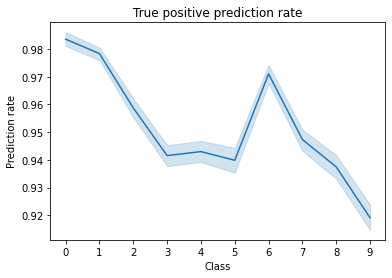

In [156]:
df = pd.DataFrame(digit_preds, columns=["Class", "Prediction rate"])

fig, ax = plt.subplots()

ax.set_xticks([0,1,2,3,4,5,6,7,8,9])

plt.title("True positive prediction rate")
sns.lineplot(data=df, x="Class", y="Prediction rate", err_style="band", ci=68)

**Q 4C Discussion**

As can be seen in the plot above, the model has its worst cases when predicting 3, 4, 5, 8 and 9. We think that it is because that those number are pretty similar to each other. The model that performed the best at the original images had an accuracy of 98.89%, and now with the denoised images (with a noise level of 0.4) it got an accuracy of 93.7%. This may be because some denoised images are not denoised correctly, i.e. they may not even look like a digit anymore. The denoised images we looked at before was just a handful, and they looked okay, but that may not be the case for all 60,000.  

**Q 4D**

The decoder's purpose is to generate a real image from a noisy image (in our case). This means that the decoder can take some noisy input and create something that is not noisy. As our decoder is learned to generate digits, it could theoretically generate a digit from just random noise. 